In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',200)

In [4]:
#Importing dataset
data = pd.read_csv(r'/content/Data.csv')

In [5]:
#load the data to understand the attributes and data types
data.head(5)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [6]:
#lets check the dimensionality of the raw data
data.shape

(61069, 21)

In [7]:
#let's take a peek at data columns
data.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [8]:
#let's look at the data types
data.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [9]:
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [10]:
#Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [11]:
pd.isnull(data).sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [12]:
# Calculate the percentage of missing values for each column
missing_percentages = (data.isnull().sum() / len(data)) * 100
missing_data = pd.DataFrame({'Missing Percentage': missing_percentages})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

                      Missing Percentage
veil-type                      94.797688
spore-print-color              89.595376
veil-color                     87.861272
stem-root                      84.393064
stem-surface                   62.427746
gill-spacing                   41.040462
cap-surface                    23.121387
gill-attachment                16.184971
ring-type                       4.046243
class                           0.000000
stem-color                      0.000000
habitat                         0.000000
has-ring                        0.000000
stem-width                      0.000000
cap-diameter                    0.000000
stem-height                     0.000000
gill-color                      0.000000
does-bruise-or-bleed            0.000000
cap-color                       0.000000
cap-shape                       0.000000
season                          0.000000


In [13]:
print('----------------------------------------')
print('      columns with missing value')
print('----------------------------------------')
print(missing_data[missing_data['Missing Percentage'] > 0])

----------------------------------------
      columns with missing value
----------------------------------------
                   Missing Percentage
veil-type                   94.797688
spore-print-color           89.595376
veil-color                  87.861272
stem-root                   84.393064
stem-surface                62.427746
gill-spacing                41.040462
cap-surface                 23.121387
gill-attachment             16.184971
ring-type                    4.046243


some column have missing values.let's drop columns with more than 50% of missing values.

In [14]:
# List of column names to drop
columns_to_drop = ['veil-type','spore-print-color','veil-color','stem-root','stem-surface']

# Drop the specified columns
data = data.drop(columns=columns_to_drop)


In [15]:
data.shape

(61069, 16)

In [16]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,w,t,p,d,w


In [17]:
#Importing dataset
data1= pd.read_csv(r'C:\Users\HP\3D Objects\5jan\Data 2.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\HP\\3D Objects\\5jan\\Data 2.csv'

In [18]:
#load the data to understand the attributes and data types
data1.head(5)

NameError: name 'data1' is not defined

In [ ]:
#lets check the dimensionality of the raw data
data1.shape

In [19]:
#let's take a peek at data columns
data1.columns

NameError: name 'data1' is not defined

In [ ]:
#let's look at the data types
data1.dtypes

In [ ]:
data1.describe()

In [20]:
data1.info()

NameError: name 'data1' is not defined

In [ ]:
pd.isnull(data1).sum()

In [21]:
# Calculate the percentage of missing values for each column
missing_percentages = (data1.isnull().sum() / len(data1)) * 100
missing_data = pd.DataFrame({'Missing Percentage': missing_percentages})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

NameError: name 'data1' is not defined

In [ ]:
print('----------------------------------------')
print('      columns with missing value')
print('----------------------------------------')
print(missing_data[missing_data['Missing Percentage'] > 0])

only 'family','name','class','cap-diameter' columns in data1 dataset have values and rest of the columns have around 100% missing values.
Given the limited size of data1 dataset with only 173 data points, merging these columns with the first dataset (data), which comprises 61,069 data points, could introduce a significant number of additional null values.Therefore, for the analysis and modeling, we will solely focus on the 'data' dataset, as merging it with 'data1' would introduce additional missing values, making the analysis less meaningful.

## EDA

In [22]:
print('poision % is: ',data['class'].value_counts()['p']/len(data)*100,'%')
print('not poision % is: ',data['class'].value_counts()['e']/len(data)*100,'%')

poision % is:  55.49132947976878 %
not poision % is:  44.50867052023121 %


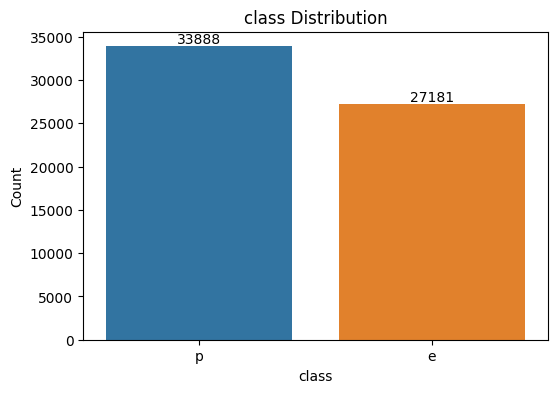

In [23]:
# Countplot for 'class'
plt.figure(figsize=(6,4))
ax=sns.countplot(data=data, x='class')
plt.title('class Distribution')
plt.xlabel('class')
plt.ylabel('Count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

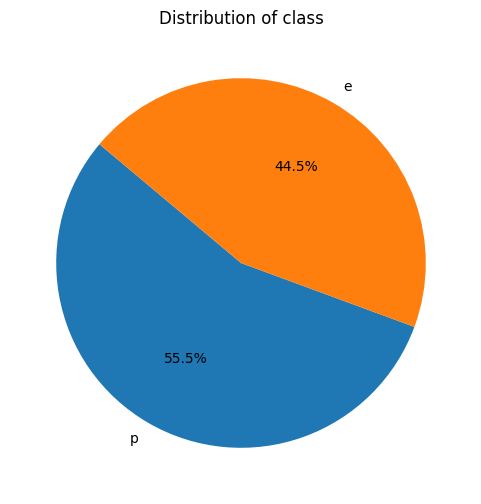

In [24]:
value_counts = data['class'].value_counts()
labels = value_counts.index
sizes = value_counts.values
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of class')

# Display the chart
plt.show()

there are more poisonous mushrooms than edible mashroom.the percentage of edible mashroom is 44.5%. the percentage of poisonous mushroom is 55.5%.

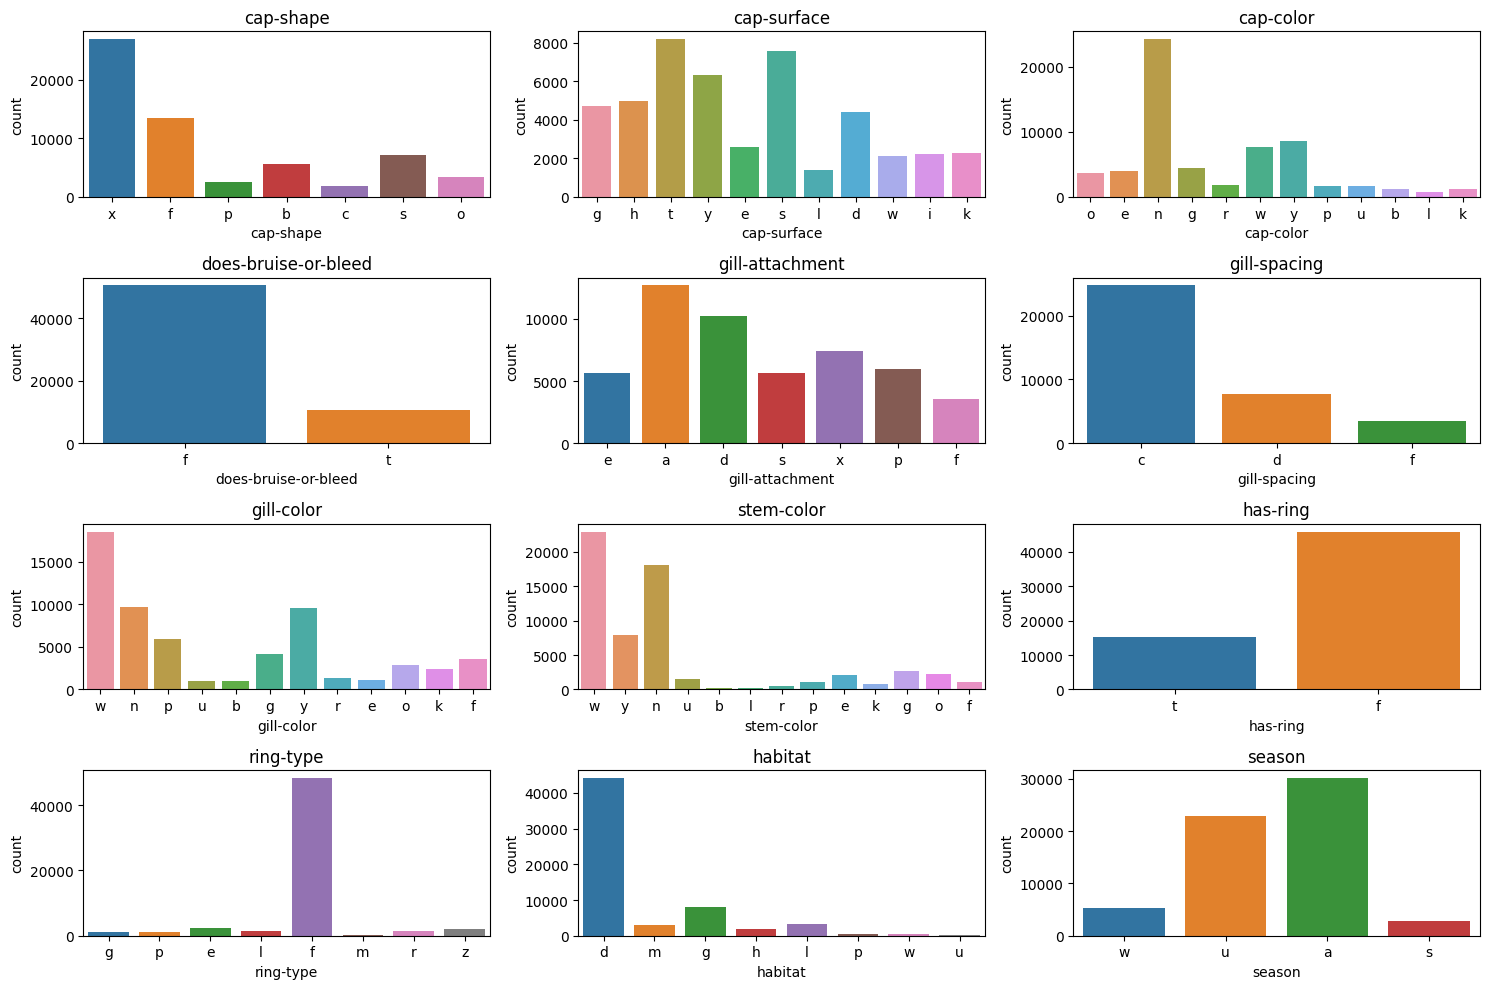

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the categorical columns for visualization
df_cat_vis = data[[ 'class','cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season']]

# Create a categorical plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_cat_vis.columns[1:]):  # Exclude 'class'
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=col, data=df_cat_vis)
    plt.title(col)
    plt.tight_layout()

plt.show()


* cap shape-Sequence of presence of mushrooms as per cap shape are convex, flat,sunken,bell,others,spherical, conical.
As per capshape, there are more convex shaped caps than all other cap - shapes.
* cap surface- As per data distribution, there are more sticky mushrooms than other mushrooms like smooth, scaly,shiny, groovey etc.
Leathery Cap surface are less in number.
* cap color-As there are more mushroom types, we have n number of colors of mushrooms.
But, as per data, there are more brown colored mushrooms, least are blue colored mushrooms.
* bruised/bleed-most mushrooms doesn't show any type of discoloration mechanism when they are physically damaged.
less mushrooms show Bruises mechanism.
* gill spacing-most of the mashrroms have close gill spacing,while very less mushrroms have no gill spacing.
* gill color-Most of mushrooms have white colored gills and very least have purple colored gills.

* steam color-Most of mushrooms have white and brown colored steam while very least have blue colored steam.
* has ring-most of the mushrooms have no rings while less have rings.
* ring type- most of the mushrooms have no rings and very little mushroom have movable ring type.
* habitate-As per habitat, most of mushrooms in given data are grown on woods.
* season- as per the data nost of the mushrooms are from autum and spring season has less mashrooms.


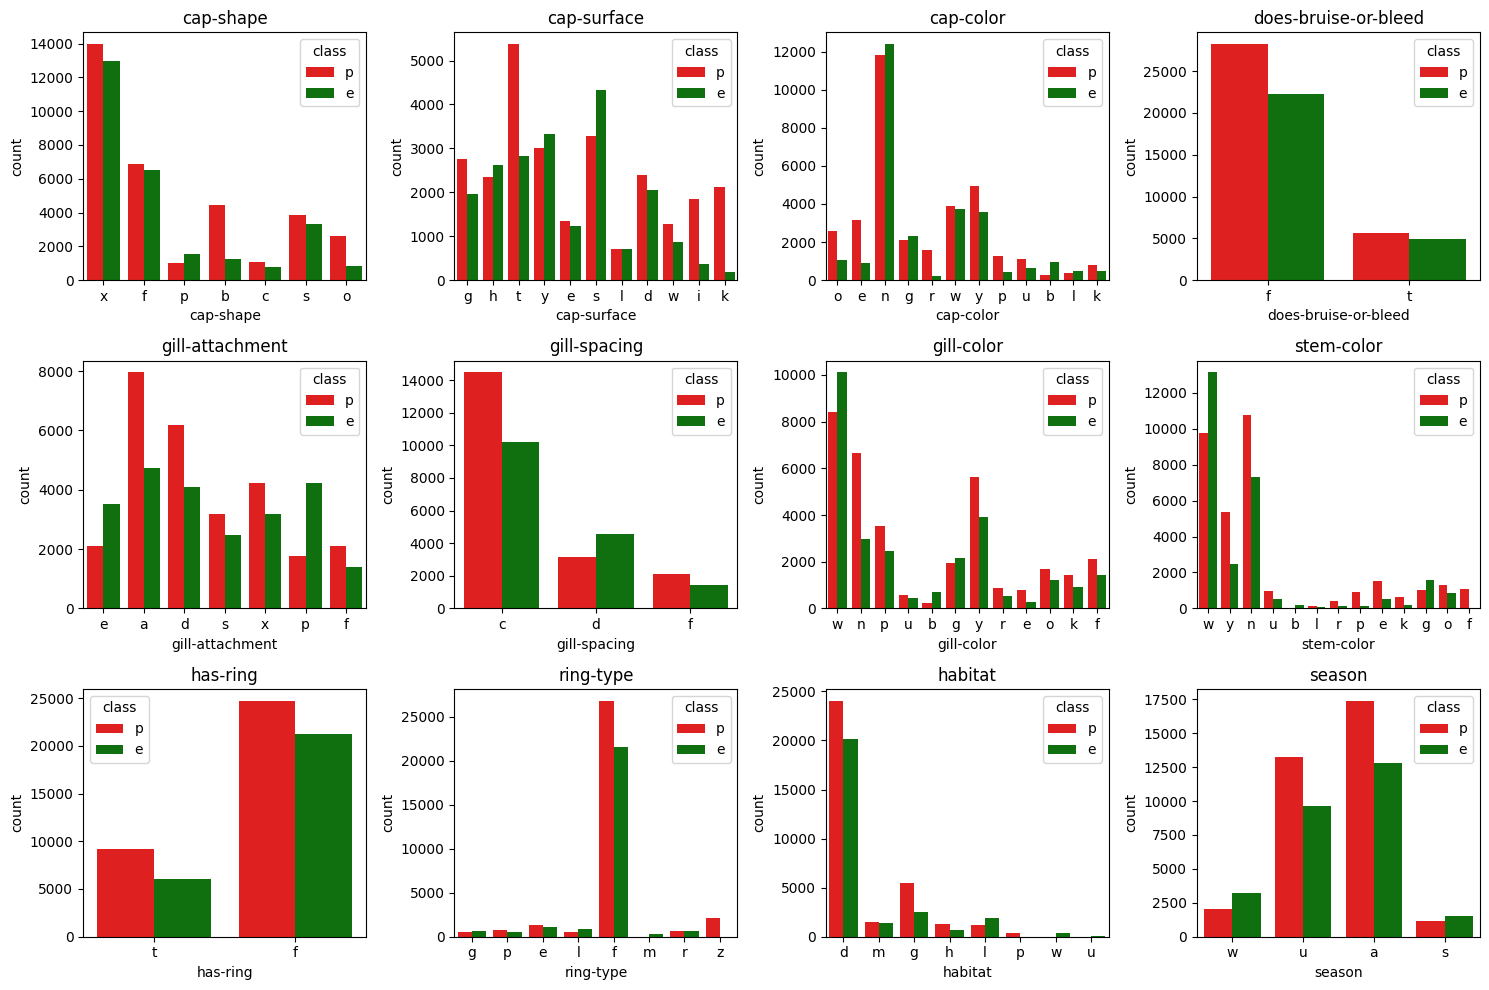

In [26]:
# Select only the categorical columns for visualization
df_cat_vis = data[['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season']]

# Set the color palette for Potability
palette = {'e': 'green', 'p': 'red'}

# Create a categorical plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_cat_vis.columns[1:]):  # Exclude 'class'
    plt.subplot(3, 4, i + 1)
    sns.countplot(x=col, hue='class', data=df_cat_vis, palette=palette)
    plt.title(col)
    plt.tight_layout()

plt.show()


* cap surface-fibrous(i),silky(k),wrinkled(w),sticky(t) cap surfaced mashrooms have more poisonous mushroom than edible mushroom.leathery(l) cap surface mushrooms have equal number of poisonous and edible mushrooms.
* cap color-red(e),green(r),purple(u),pink(p) coloured mushrooms have more poisonous mushroom while buff(b) coloured mushroom have more edible mushrooms.
* bruise/bleed-The majority of both types of mushrooms, whether they bruise or not, are poisonous.
The percentage of edible mushrooms among those that bruise or bleed is slightly higher compared to those that do not.
* gill attachment-The pores(p) gill attachment type mushroom, have more edible mushrooms than poisonous mushrooms.
* stem color-all buff(b) stem colored mushrooms are edible.
* ring type-all movable(m) ring type mushrooms are edible and all zone(z) ring type mashrooms are poisonous.
* habitat-'wood' and 'grass' appear to have a substantial number of mushrooms and contribute significantly to both edible and poisonous categories.
* Habitats 'urban' and 'waste' have only edible mushrooms.all path hebitate mushrooms are poisonous.

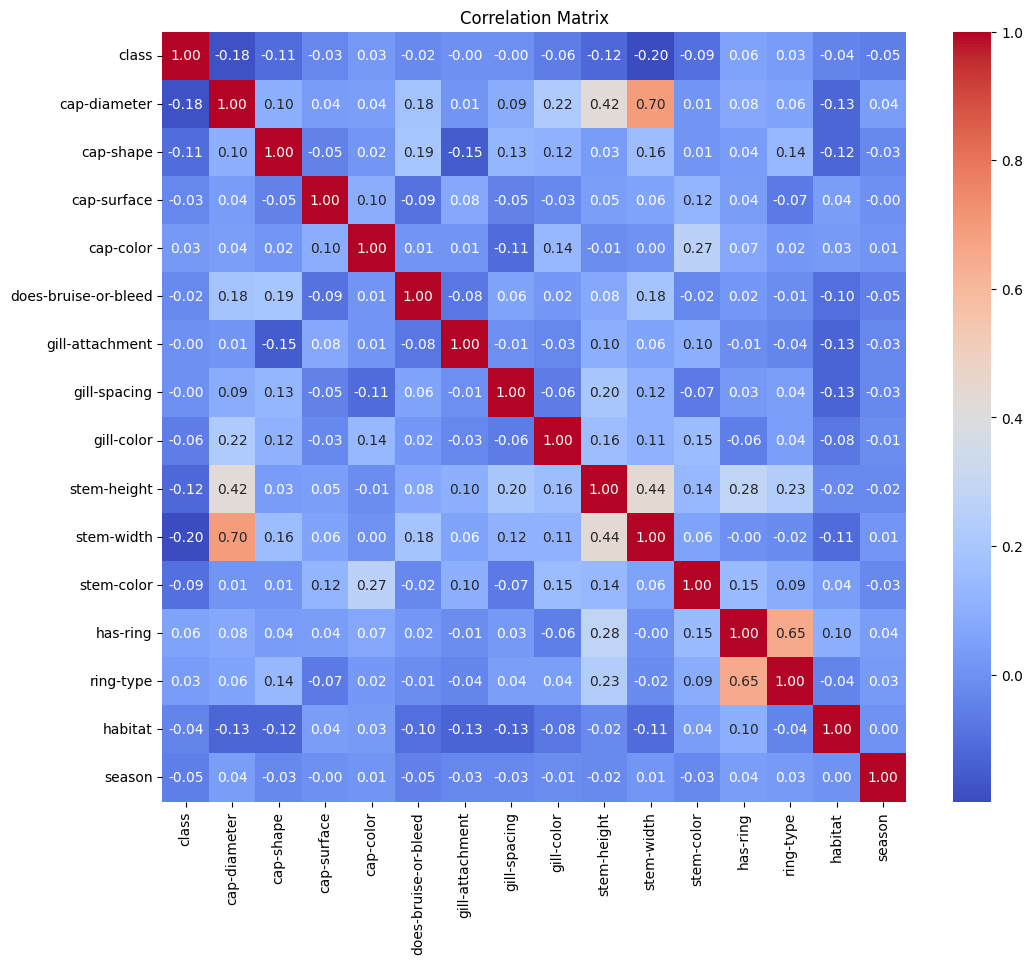

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Label Encoding
le = LabelEncoder()
df_encoded = data.copy()
categorical_columns = data.select_dtypes(include=['object']).columns
df_encoded[categorical_columns] = data[categorical_columns].apply(lambda col: le.fit_transform(col))

# 2. Correlation Analysis
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

there is no strong co-relation between any variables.

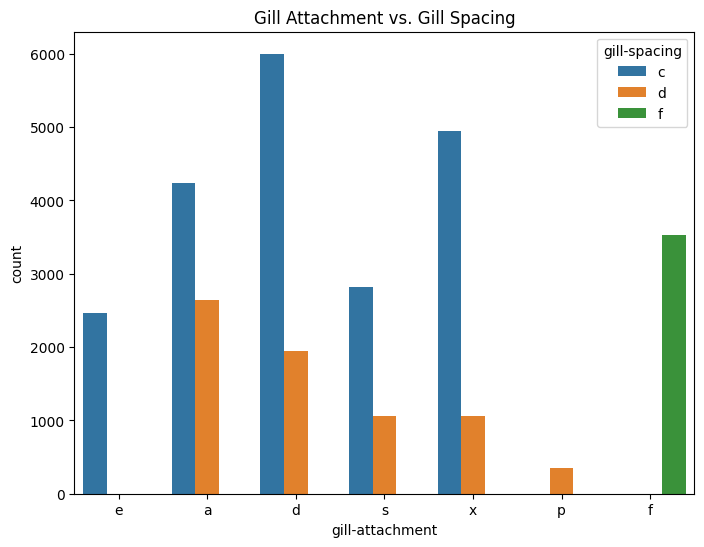

In [28]:
# Example 5: Gill Attachment vs. Gill Spacing
plt.figure(figsize=(8, 6))

sns.countplot(x='gill-attachment', hue='gill-spacing', data=data)
plt.title('Gill Attachment vs. Gill Spacing')

plt.show()

mushrooms with no(f) gill spacing have no (f)gill attachment.mushrooms with pores(p) gill attachment have only distant (d)gill spacing. mushrooms with free(e) gill attachment have only close(c) gill spacing.

In [29]:
df=data[data['class']=='e']
cross_tab = pd.crosstab(index=data['habitat'], columns=df['season'], margins=True, margins_name='Total')
print(cross_tab)


season       a     s     u     w  Total
habitat                                
d         9607  1124  7233  2199  20163
g         1120   142   865   362   2489
h          338     0   358     0    696
l          944   168   431   395   1938
m          577    92   554   204   1427
u           27    27    25    36    115
w          172     0   181     0    353
Total    12785  1553  9647  3196  27181


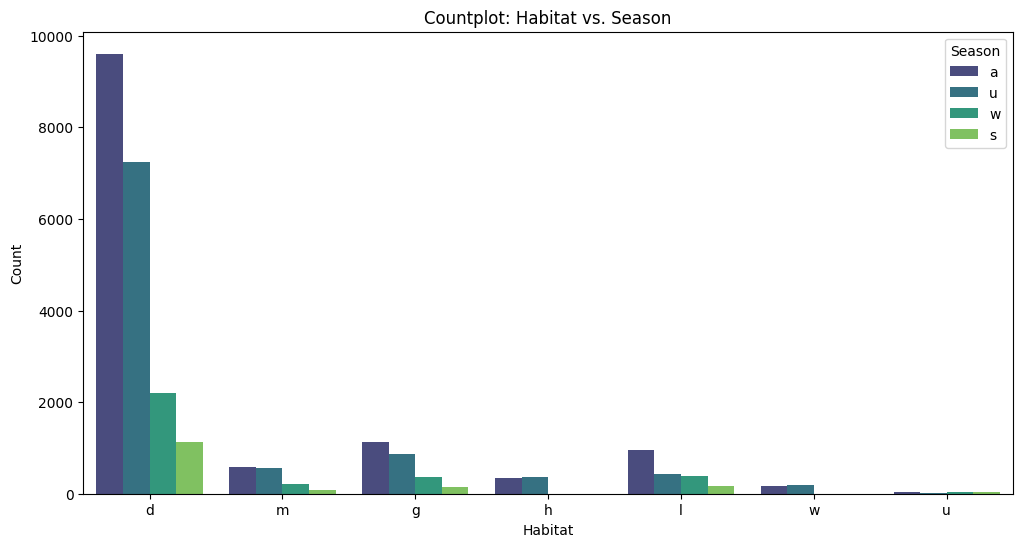

In [30]:
# Countplot for Habitat vs. Season
plt.figure(figsize=(12, 6))

sns.countplot(x='habitat', hue='season', data=df, palette='viridis')

# Set labels and title
plt.title('Countplot: Habitat vs. Season')
plt.xlabel('Habitat')
plt.ylabel('Count')

# Add legend
plt.legend(title='Season', loc='upper right')

plt.show()


waste  and heaths habitate edible mushrooms are found in only autumn and summer seasons. most edible mushrooms are found in woods in autumn season.

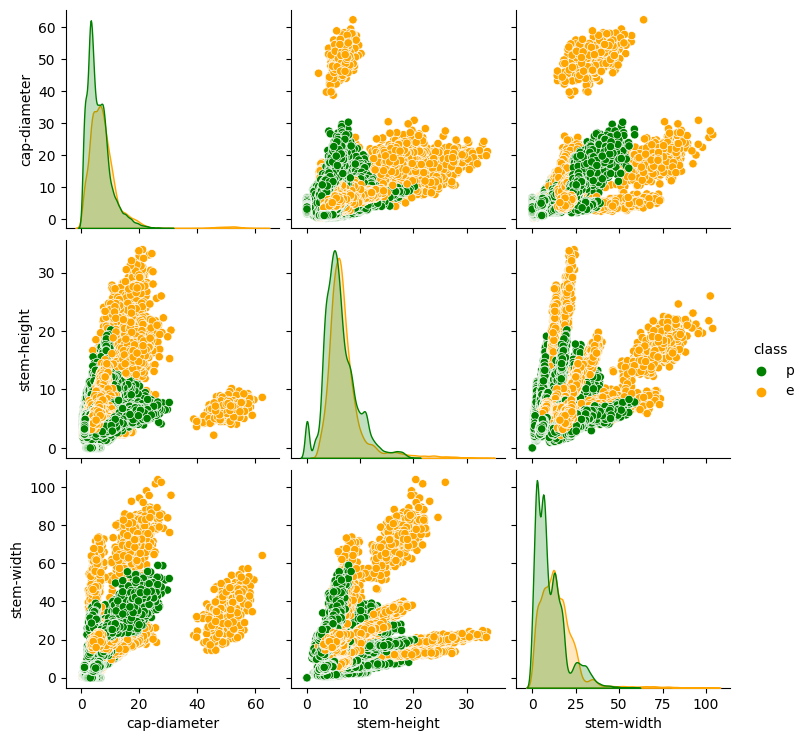

In [31]:
sns.pairplot(data,hue='class',palette=['green','orange'])

based on these plots,it looks like a large cap-diameter coupled with a large stem-height or stem-width is a good indication that a mashroom is edible.

## Data Preprocessing

In [32]:
#importing necessary libraries
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier

## LABEL ENCODING

In [33]:
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    if data[column].dtype==np.number:
        continue
    else:
        data[column]=LabelEncoder().fit_transform(data[column])

In [34]:
from sklearn.preprocessing import StandardScaler
X = data.drop(columns=['class'])
Y = data['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest Model

In [35]:
model1= RandomForestClassifier(random_state=42)
model1.set_params(criterion = 'gini',
                  max_features = None,
                  max_depth = 12,
                 min_samples_leaf=1,min_samples_split=2)
model1.set_params(n_estimators=200,
                  bootstrap = True,
                  warm_start=False,
                 oob_score=True)
model1.fit(X_train,Y_train)
print(model1.score(X_train, Y_train))
y_pred=model1.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
cm

0.9976460955889879


array([[5367,    7],
       [  34, 6806]])

In [36]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
accuracy=accuracy_score(Y_test,y_pred)
print('accuracy=',accuracy)
precision=precision_score(Y_test,y_pred)
print('precision =',precision)
recall=recall_score(Y_test,y_pred)
print('recall=',recall)
# Generate a classification report
class_report = classification_report(Y_test, y_pred)
print('Classification Report:\n', class_report)

accuracy= 0.996643196332078
precision = 0.9989725524732129
recall= 0.9950292397660818
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



## logistic Regression model

In [37]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter=2000, random_state=42)

# Train the model on the training data
model2.fit(X_train, Y_train)
print(model2.score(X_train, Y_train))

# Make predictions on the test data
Y_pred = model2.predict(X_test)

# Evaluate the model

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
class_report = classification_report(Y_test, Y_pred)
print('Classification Report:\n', class_report)
cm=confusion_matrix(Y_test,Y_pred)
cm

0.6245624808105619
Accuracy: 62.12%
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.44      0.50      5374
           1       0.63      0.76      0.69      6840

    accuracy                           0.62     12214
   macro avg       0.61      0.60      0.60     12214
weighted avg       0.62      0.62      0.61     12214



array([[2360, 3014],
       [1613, 5227]])

## XG Boost Classifier

In [38]:
from xgboost import XGBClassifier

In [39]:
model3 = XGBClassifier(
    max_depth=4,
    learning_rate=0.2,
    n_estimators=500,
    seed=42)

# Train the model on the training data
model3.fit(X_train, Y_train)
print(model3.score(X_train, Y_train))

# Make predictions on the test data
y_pred = model3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)

1.0


In [40]:
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_rep)
# Create and display a confusion matrix
confusion_mat = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.9996725069592272

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

Confusion Matrix:
 [[5374    0]
 [   4 6836]]


## KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
k = 5  # You can adjust this value
model4 = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
model4.fit(X_train, Y_train)
print(model4.score(X_train, Y_train))
# Make predictions on the test data
y_pred = model4.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:\n", class_report)

# Create and display a confusion matrix
confusion_mat = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

0.9996725002558592
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

Confusion Matrix:
 [[5373    1]
 [   4 6836]]


## SVC

In [42]:
from sklearn.svm import SVC
model5 = SVC(kernel='rbf',gamma=0.2, probability=True, cache_size=500, random_state=None)
model5.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model5.predict(X_test)
print(model5.score(X_train, Y_train))

# Evaluate the model's performance
accuracy=accuracy_score(Y_test,y_pred)
print('accuracy=',accuracy)
classification_report_str = classification_report(Y_test, y_pred)

# Print the evaluation results
print("Classification Report:\n", classification_report_str)
# Create and display a confusion matrix
confusion_mat = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

0.9993040630437008
accuracy= 0.9993450139184542
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

Confusion Matrix:
 [[5371    3]
 [   5 6835]]


In [43]:
# Calculate accuracy, F1 score, and AUC of all models

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model_metrics = []

models = [('RandomForestClassifier',model1),('LogisticRegression',model2),('XGboost',model3),('KNN_Classsification',model4),
          ('SVC',model5)]

for model_name, model in models:
    model.fit(X_train, Y_train)
    Train_accuracy=model.score(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    Test_accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_prob)

    model_metrics.append([model_name,Train_accuracy,Test_accuracy, f1, auc])
metrics_df = pd.DataFrame(model_metrics, columns=['Model', 'Train_accuracy','Test_accuracy' ,'F1 Score', 'AUC'])
# Display the table of model performance metrics
print(metrics_df)

                    Model  Train_accuracy  Test_accuracy  F1 Score       AUC
0  RandomForestClassifier        0.997646       0.996643  0.996997  0.999842
1      LogisticRegression        0.624562       0.621172  0.693190  0.661175
2                 XGboost        1.000000       0.999673  0.999708  1.000000
3     KNN_Classsification        0.999673       0.999591  0.999634  1.000000
4                     SVC        0.999304       0.999345  0.999415  0.999999


XG Boost classifier gives the best accuracy,F1 Score and AUC. so let's perform hyper parameter tuning to improve the model.

## Hyper parameter tuning of XGB classifier

In [44]:
#Hyper parameter tuning of XGB classifier
param_grid = {
    'learning_rate': [0.1,0.2,0.001,0.01,0.02,0.5],
    'max_depth': [2,6,4,8],
    'n_estimators': [500,200,100,700,1000]}
xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_;
print(best_params)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
{'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 500}


In [45]:
model3 = XGBClassifier(
    max_depth=4,
    learning_rate=0.5,
    n_estimators=500,
    seed=42)

# Train the model on the training data
model3.fit(X_train, Y_train)
print(model3.score(X_train, Y_train))

# Make predictions on the test data
y_pred = model3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_rep)
# Create and display a confusion matrix
confusion_mat = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

1.0
Accuracy: 0.9998362534796136

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

Confusion Matrix:
 [[5374    0]
 [   2 6838]]


In [46]:
# Calculate accuracy, F1 score, and AUC of all models after hyper parameter tuning

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model_metrics = []

models = [('RandomForestClassifier',model1),('LogisticRegression',model2),('XGboost',model3),('KNN_Classsification',model4),
          ('SVC',model5)]

for model_name, model in models:
    model.fit(X_train, Y_train)
    Train_accuracy=model.score(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    Test_accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_prob)

    model_metrics.append([model_name,Train_accuracy,Test_accuracy, f1, auc])
metrics_df = pd.DataFrame(model_metrics, columns=['Model', 'Train_accuracy','Test_accuracy' ,'F1 Score', 'AUC'])
# Display the table of model performance metrics
print(metrics_df)

                    Model  Train_accuracy  Test_accuracy  F1 Score       AUC
0  RandomForestClassifier        0.997646       0.996643  0.996997  0.999842
1      LogisticRegression        0.624562       0.621172  0.693190  0.661175
2                 XGboost        1.000000       0.999836  0.999854  1.000000
3     KNN_Classsification        0.999673       0.999591  0.999634  1.000000
4                     SVC        0.999304       0.999345  0.999415  0.999999


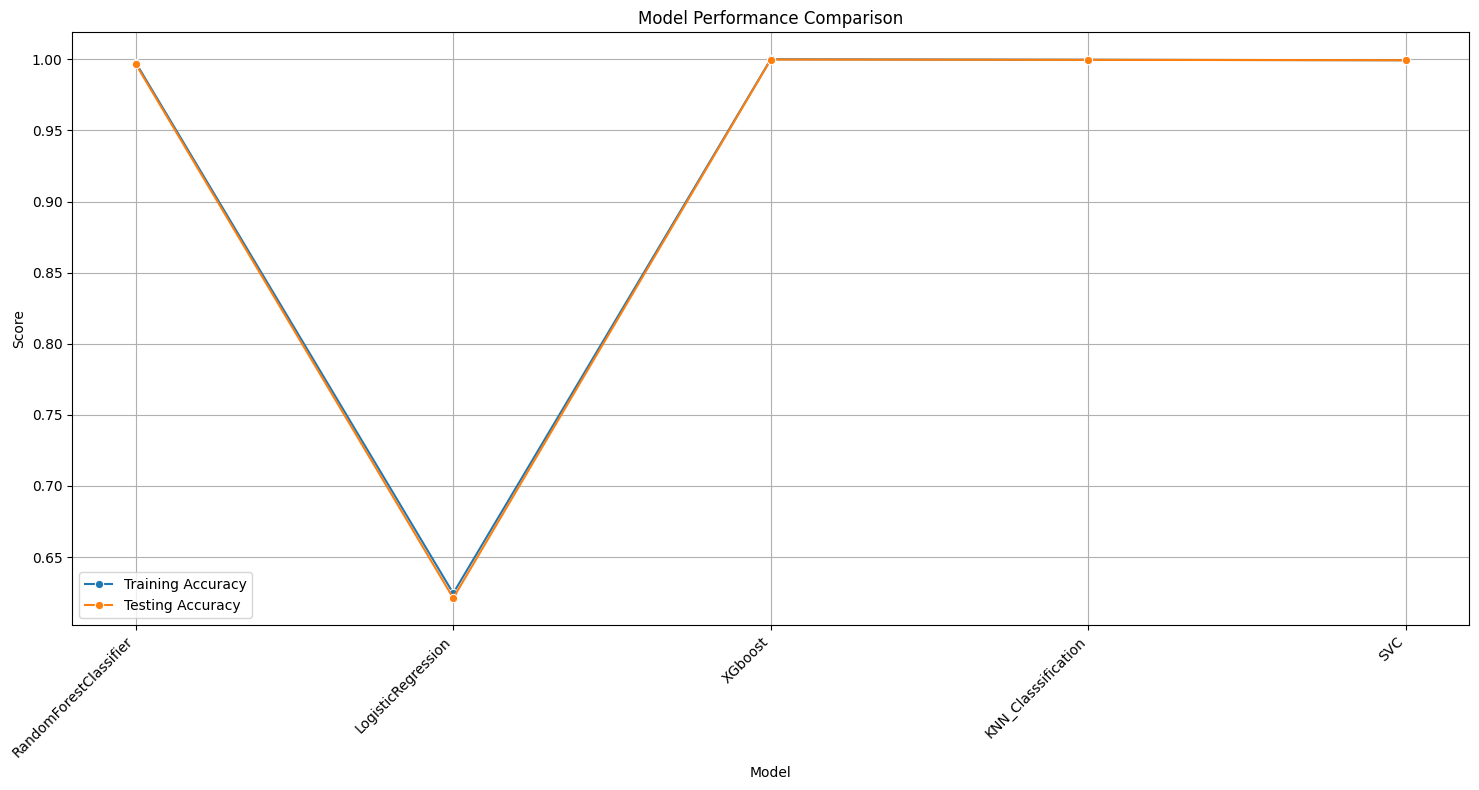

In [47]:
plt.figure(figsize=(15, 8))
# Add training and testing accuracy
sns.lineplot(data=metrics_df, x='Model', y='Train_accuracy', marker='o', label='Training Accuracy')
sns.lineplot(data=metrics_df, x='Model', y='Test_accuracy', marker='o', label='Testing Accuracy')

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


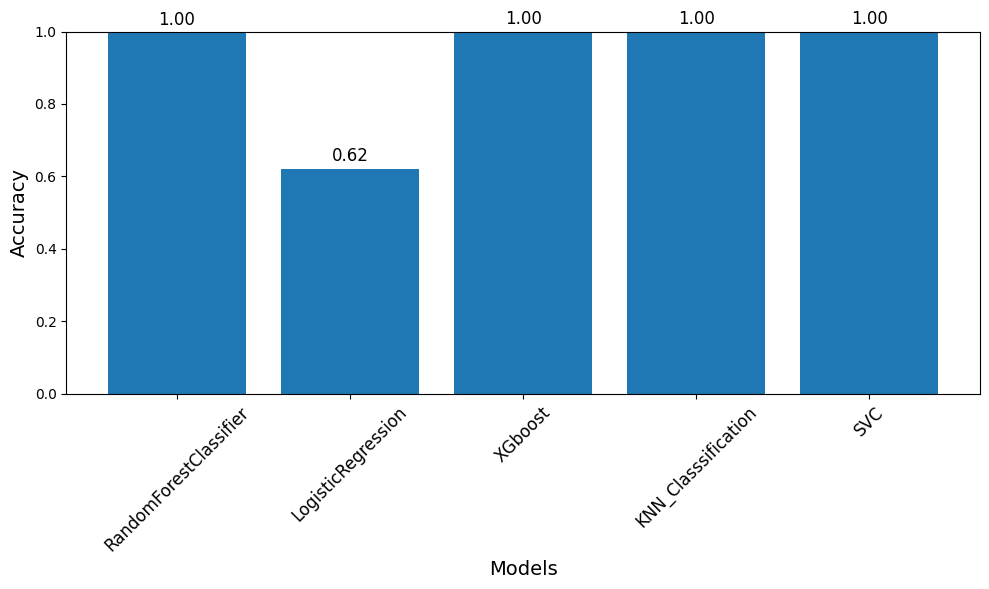

In [48]:
#plotting Model Accuracy Comparison
model_names = ['RandomForestClassifier','LogisticRegression','XGboost','KNN_Classsification',
          'SVC']
accuracies = [0.996,0.621,0.9998,0.9995,0.9993]
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
for i, score in enumerate(accuracies):
    plt.text(i, score + 0.01,f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Customize the chart
#plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Set the y-axis limit (0 to 1)
plt.xticks(rotation=45, fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()

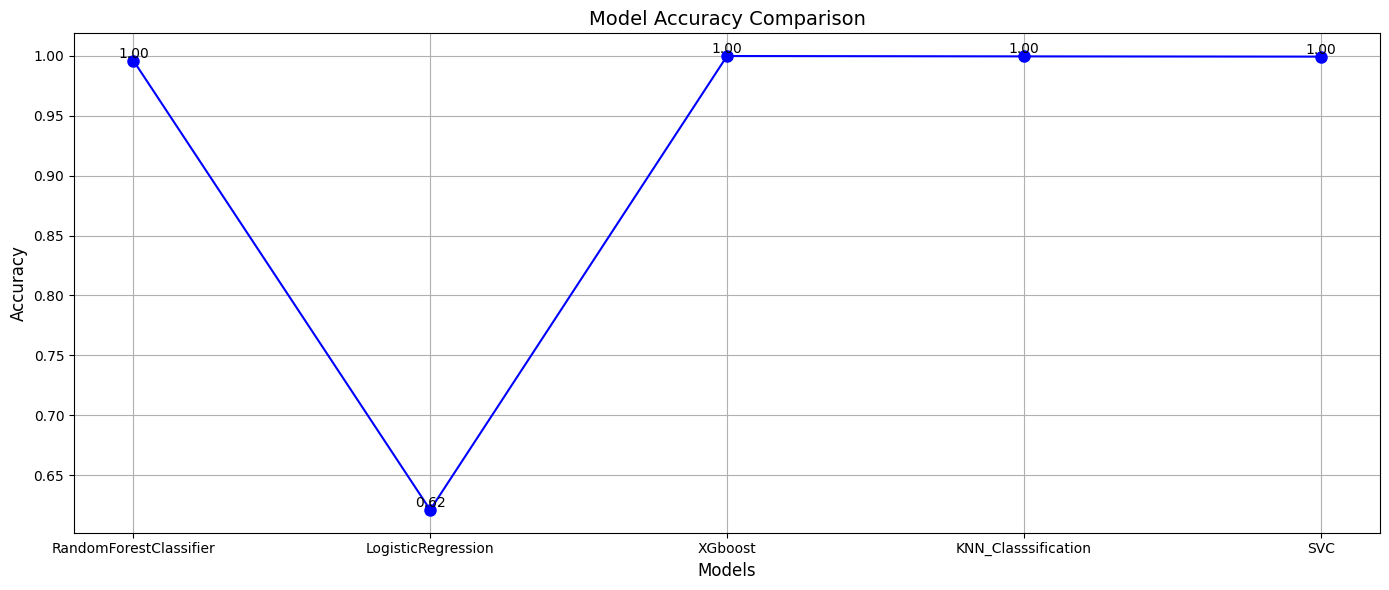

In [49]:
#Model Accuracy Comparison
model_names = ['RandomForestClassifier','LogisticRegression','XGboost','KNN_Classsification',
          'SVC']
accuracies = [0.996,0.621,0.9998,0.9995,0.9993]

plt.figure(figsize=(14, 6))
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='b', markersize=8)


plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)

for i in range(len(model_names)):
    plt.text(model_names[i], accuracies[i], f'{accuracies[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Show the chart
plt.grid(True)
plt.tight_layout()
plt.show()

after applying hyperparameter tuning on xgb classifier model our accuracy,f1 score ,precision and recall incresed.so for our final model we are going to use xgb classifier with tuning.

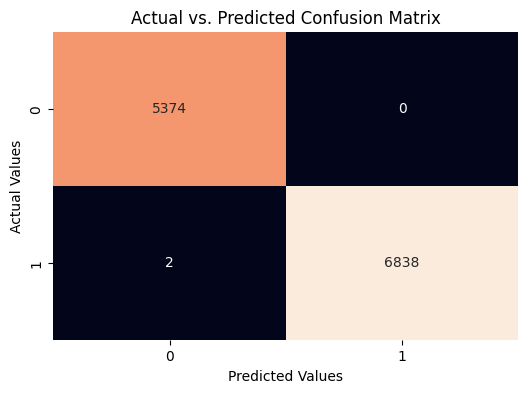

In [50]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## Feature Importance

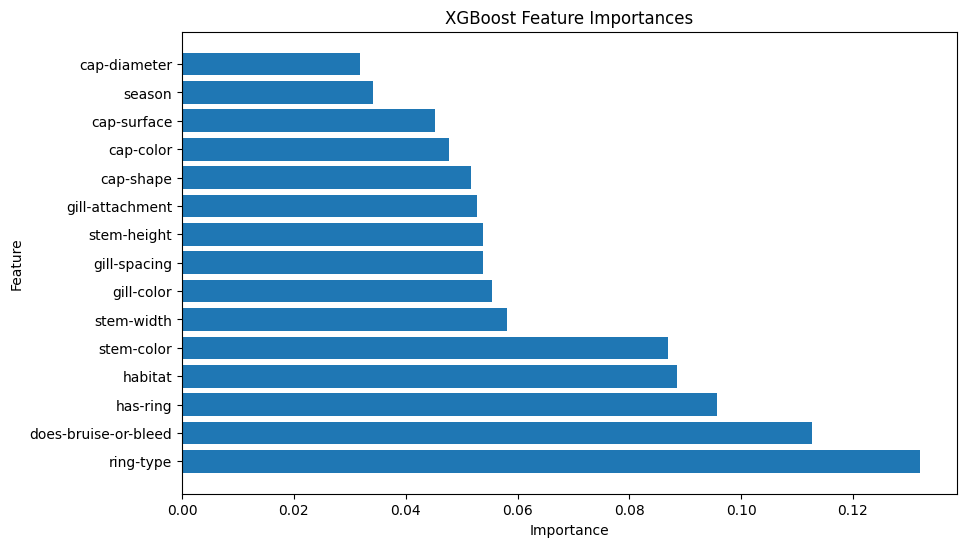

In [51]:
importances = model3.feature_importances_

# Get the names of the features (assuming they are stored in a list called 'feature_names')
feature_names =['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season']

# Create a DataFrame to hold the feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.show()

Based on the summary plot, it shows that  ring-type , has-ring and  does-bruise-or-not give the most impact on the model decision.

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Here we calculate the test error rate!
test_error_rate = 1 - accuracy
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate))

The test error rate for our model is:
  0.0002


## Area Under Curve (AUC)

In [53]:
predictions_prob = model3.predict_proba(X_test)[:, 1]

fpr2, tpr2,_ = roc_curve(Y_test,
                          predictions_prob,
                          pos_label = 1)
auc=auc(fpr2,tpr2)
auc

0.9999998639757811

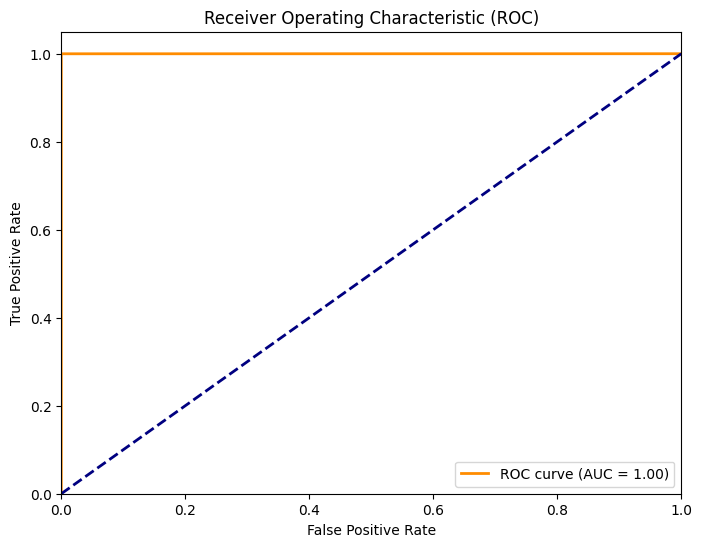

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

The Receiver Operating Characteristic (ROC) curve illustrates the trade-off between the true positive rate (sensitivity) and false positive rate (1-specificity) across different thresholds. With an Area Under the Curve (AUC) of 0.999, our model demonstrates reasonably good discriminative power.
